# COVID-19 projections

**Author:** Felipe A. Millacura

**Date:** 13/12/2020

COVID-19 is a disease that has everyone under constant alert. An important aspect that authorities must consider is how much the disease is expected to disseminate and what kind of measures need to be taken in order to decrease the impact of the global pandemic.

This project considers the design and implementation of COVID-19 projection models and evaluates the impact of different measures currenlty being taken.

This will be done by _solving differential equations_ considering different stages of the infection. A basic example of this is the **SEIR model (Susceptible-Exposed-Infectious-Recovered)**. This model needs to be improved to incorporate varibles such as *limited PCR exams and hospitalised, critical and death patients*.

## Introduction

COVID-19 is a contagious disease caused by the Severe Acute Respiratory Syndrome Coronavirus 2 (SARS-CoV-2) identified for the first time in Wuhan, China, in late 2019. It has since spread worldwide, leading to an ongoing pandemic affecting 220 countries around the globe, with over 70.5 million people infected and 1.60 million deaths at the time of writing (WHO, Last update: 13 December 2020, 3:48 pm GMT-3).

SARS-CoV-2 is mainly transmitted through droplets generated when an infected person coughs, sneezes, or exhales. These droplets are not mantained in the air by themselves and fall quickly on floors or surfaces. These become contagious for a window of a few hours being able to transmit the disease to uninfected people.

A plethora of responses has been observed worldwide but as the virus spreads rapidly, outbreaks can reach exponential rates of propagation really fast. The World Health Organization (WHO, 2020) created global strategic objectives to respond to this.

1. **Mobilize** all sectors and communities to ensure that every sector of government and society takes ownership of and participates in the response and in preventing cases through hand hygiene, respiratory etiquette and *individual-level physical distancing*.
2. **Control** sporadic cases and clusters and prevent community transmission by rapidly *finding and isolating all cases*, providing them with appropriate care, and tracing, quarantining, and supporting all contacts.
3. **Suppress** community transmission through context-appropriate infection prevention and control measures, population level physical distancing measures, and appropriate and proportionate *restrictions on non-essential domestic and international travel*.
4. **Reduce** mortality by providing appropriate clinical care for those affected by COVID-19, *ensuring the continuity of essential health and social services*, and protecting frontline workers and vulnerable populations.
5. **Develop** safe and effective vaccines and therapeutics that can be delivered at scale and that are accessible based on need

Each country has implemented these recommendations within their internal jusrisdiction by following their own principles, thus diverse infection curves and rates can be observed. Most countries currently provide data for daily number of cases and deaths, being these the most used to represent the curves aforementioned. For instance if we use the EUCDC data we can observe:

In [1]:
# Imports libraries

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Imports Covid19 worldwide data

df_world = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')

In [3]:
df_city_deaths = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto38/CasosFallecidosPorComuna_std.csv")

df_city_deaths.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Casos fallecidos
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-06-12,10.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-06-12,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-06-12,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-06-12,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,2020-06-12,NaN


In [13]:

df_deaths_region = df_city_deaths[df_city_deaths['Comuna']=='Total'].groupby(['Region','Fecha'])[['Casos fallecidos']].sum()     
df_deaths_region.reset_index().head()

,Region,Fecha,Casos fallecidos
0,Antofagasta,2020-06-12,64.0
1,Antofagasta,2020-06-15,71.0
2,Antofagasta,2020-06-19,92.0
3,Antofagasta,2020-06-23,99.0
4,Antofagasta,2020-06-28,158.0


In [15]:

df_deaths_current = df_deaths_region.reset_index().pivot(index='Fecha', columns='Region', values='Casos fallecidos')

df_deaths_current.tail()

Region,Antofagasta,Arica y Parinacota,Atacama,Aysen,Biobio,Coquimbo,Del Libertador General Bernardo O’Higgins,La Araucania,Los Lagos,Los Rios,Magallanes y la Antartica,Maule,Metropolitana,Nuble,Tarapaca,Valparaiso
Fecha,,,,,,,,,,,,,,,,
2020-12-18,607.0,225.0,109.0,14.0,740.0,306.0,583.0,263.0,243.0,74.0,230.0,531.0,11000.0,201.0,279.0,1300.0
2020-12-21,613.0,226.0,111.0,14.0,761.0,309.0,590.0,274.0,252.0,78.0,234.0,539.0,11056.0,208.0,281.0,1310.0
2020-12-25,615.0,231.0,111.0,14.0,794.0,310.0,591.0,283.0,260.0,82.0,240.0,550.0,11121.0,216.0,283.0,1326.0
2020-12-28,615.0,232.0,111.0,14.0,810.0,313.0,597.0,288.0,265.0,86.0,240.0,554.0,11153.0,218.0,284.0,1334.0
2021-01-01,618.0,234.0,112.0,14.0,844.0,318.0,602.0,307.0,273.0,94.0,244.0,565.0,11239.0,224.0,296.0,1357.0


The current situation in different continents can be observed by calculating the cumulative number of cases

[Text(0.5, 0, 'Number of cases x10M'),
 Text(0, 0.5, 'Continent'),
 Text(0.5, 1.0, 'Cumulative cases by Continent')]

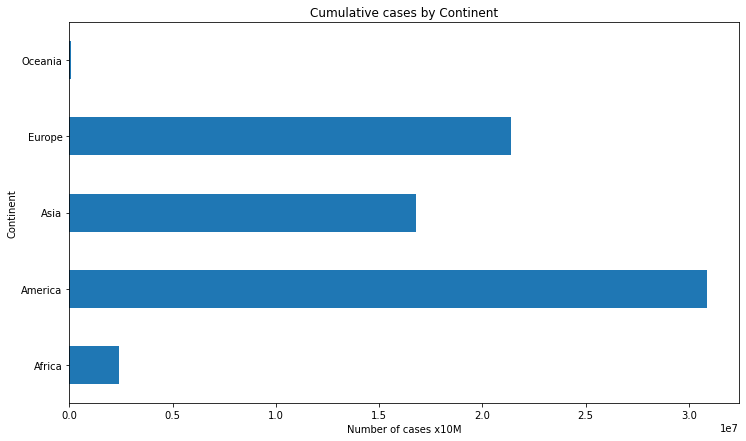

In [4]:
#Groups cases by continent

df_world.dropna().groupby('continentExp')['cases'].sum(
).plot.barh(x='geoId', 
            y='cases',
            figsize=(12, 7)
           ).set(xlabel="Number of cases x10M", 
                 ylabel="Continent", 
                 title="Cumulative cases by Continent")





Now if we want to check the cumulative number of cases per country over time 

In [49]:
#Saves data with time series format
df_ts_world = df_world.dropna(subset=['geoId']).pivot(
    index='dateRep',
    columns='geoId',
    values=['cases',
            'deaths'])

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Cumulative number of cases (in millions)'),
 Text(0.5, 1.0, 'Cumulative cases by Country')]

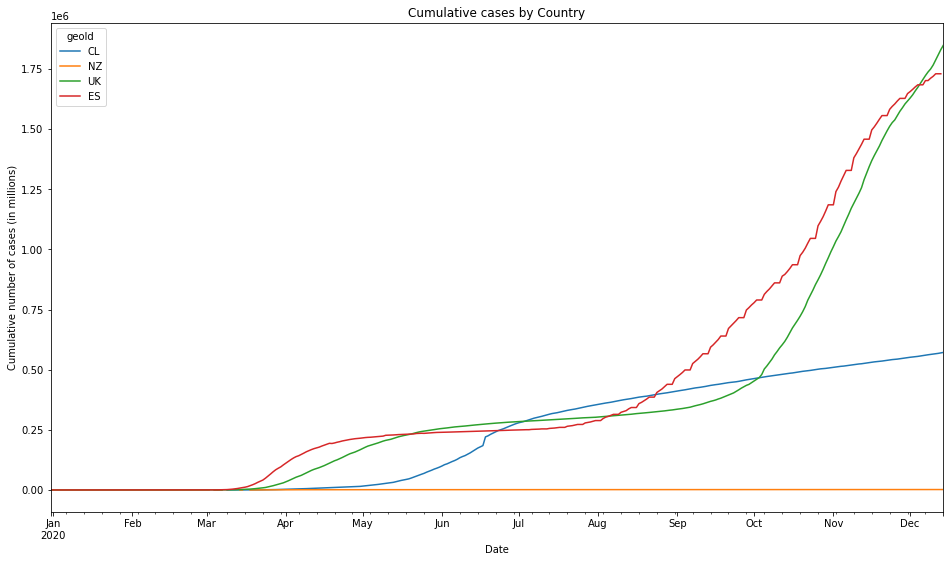

In [6]:
#Plot countries cumulative cases over time

countries = ['CL','NZ', 'UK', 'ES']

df_ts_world['cases'][countries].cumsum(
).plot(figsize=(16, 9)
      ).set(xlabel="Date", 
            ylabel="Cumulative number of cases (in millions)", 
            title="Cumulative cases by Country")

and the same can be done for the number of deaths

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of deaths'),
 Text(0.5, 1.0, 'Cumulative deaths by country')]

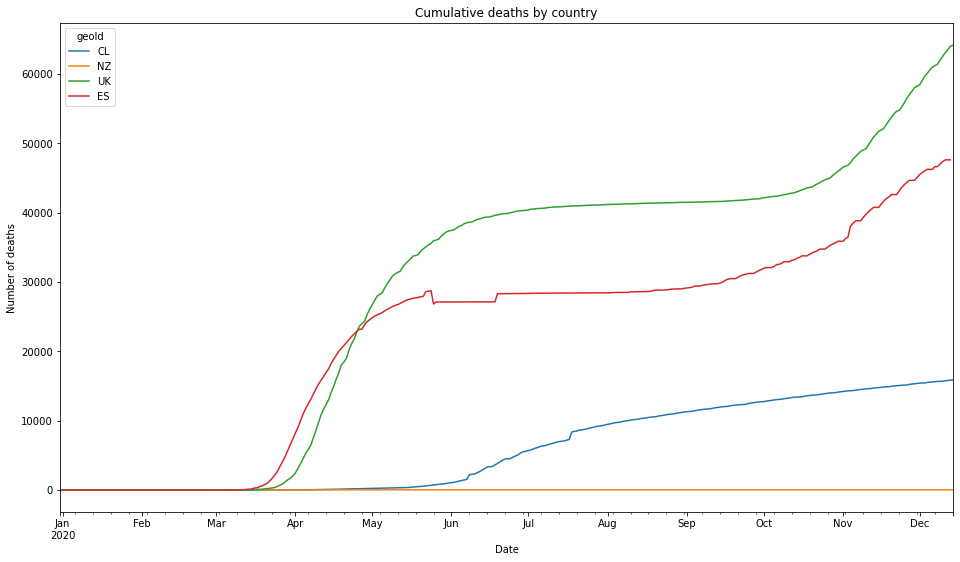

In [7]:
#Plots countries cumulative deaths over time

#countries = ['CL','ES', 'UK', 'DE']

df_ts_world['deaths'][countries].cumsum(
).plot(figsize=(16, 9)
      ).set(xlabel="Date", 
            ylabel="Number of deaths", 
            title="Cumulative deaths by country")

Or to compare both daily cases for a specific country

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of cases reported'),
 Text(0.5, 1.0, 'Daily Covid19 cases and deaths reported')]

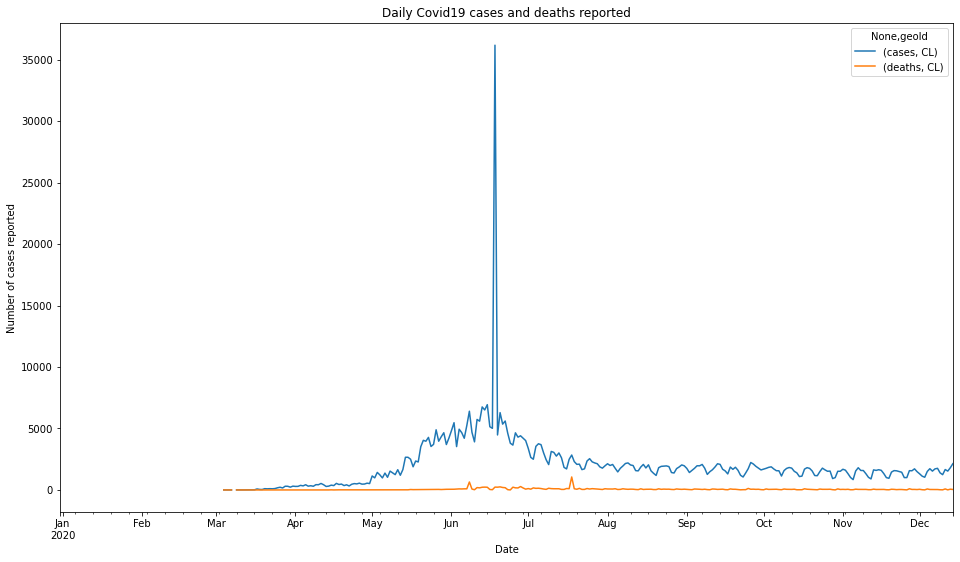

In [8]:
df_ts_world[[('cases', 'CL'), ('deaths', 'CL')]].plot(figsize=(16, 9)
                               ).set(xlabel="Date", 
                                     ylabel="Number of cases reported", 
                                     title="Daily Covid19 cases and deaths reported",
                                     )


In order to analyse the Chilean specific case, the governement has opened the data and it's constantly updating the databases available at https://www.minciencia.gob.cl/covid19, which are further explained at https://github.com/MinCiencia/Datos-COVID19, being both maintained directly by the *Ministerio de Ciencia*. 

For this work, the following ones will be used:

In [9]:
#SEIR by city

#Susceptible

## Can be considered as the number of inhabitants for a specific city, minus the probable, confirmed and death cases

#Exposed
df_probable = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto45/CasosProbablesPorComunaHistorico_std.csv") 

#Infectious

df_city = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto25/CasosActualesPorComuna_std.csv")

#Recovered

##No data available by city, it could be calculated in an approximate but innacurate way

#Deaths

df_city_deaths = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto38/CasosFallecidosPorComuna_std.csv")


#Number of exams

##No data available by city

#Hospitalised patients

##No data available by city

#Critical cases

##No data available by city


In [19]:
#SEIR by region

#Susceptible

## Can be considered as the number of inhabitants for a specific region, minus the probable, confirmed and death cases


#Exposed
df_city_probable = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto45/CasosProbablesPorComunaHistorico_std.csv") 

#Infectious

df_city_current = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto25/CasosActualesPorComuna_std.csv")

#Recovered

## Not available - Muertes_totales - Casos_actuales

#Deaths

df_city_deaths = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto38/CasosFallecidosPorComuna_std.csv")


#Number of exams

df_pcr_region = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR_std.csv")

#Critical patients
df_uci_region = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto8/UCI_std.csv")

In [7]:
df_pcr_current = df_pcr_region[['Region', 'fecha', 'numero']]
df_pcr_current = df_pcr_region.pivot(index='fecha', columns='Region', values='numero')
df_pcr_current

Region,Antofagasta,Araucanía,Arica y Parinacota,Atacama,Aysén,Biobío,Coquimbo,Los Lagos,Los Ríos,Magallanes,Maule,Metropolitana,O’Higgins,Tarapacá,Valparaíso,Ñuble
fecha,,,,,,,,,,,,,,,,
2020-04-09,182.0,124.0,70.0,57.0,10.0,592.0,NaN,341.0,NaN,73.0,397.0,5383.0,68.0,NaN,301.0,364.0
2020-04-10,128.0,148.0,NaN,52.0,NaN,149.0,NaN,199.0,91.0,24.0,219.0,3185.0,NaN,NaN,249.0,NaN
2020-04-11,107.0,126.0,93.0,60.0,NaN,281.0,NaN,178.0,NaN,46.0,NaN,2105.0,74.0,NaN,248.0,259.0
2020-04-12,175.0,184.0,103.0,25.0,7.0,469.0,NaN,225.0,NaN,45.0,341.0,3861.0,NaN,NaN,273.0,189.0
2020-04-13,103.0,232.0,NaN,20.0,NaN,NaN,NaN,39.0,NaN,45.0,113.0,1850.0,74.0,NaN,223.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,2641.0,1367.0,1016.0,246.0,378.0,5885.0,863.0,3737.0,1123.0,656.0,1989.0,15510.0,1338.0,1120.0,3562.0,1139.0
2021-01-01,1885.0,1887.0,929.0,763.0,369.0,5951.0,2016.0,5002.0,1278.0,809.0,3309.0,17561.0,2020.0,1110.0,4288.0,1406.0
2021-01-02,2579.0,1803.0,1030.0,857.0,404.0,5950.0,1081.0,5123.0,1575.0,664.0,1336.0,15741.0,2530.0,947.0,3436.0,1122.0


In [12]:
df_uci_region = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto8/UCI_std.csv")

df_uci_current = df_uci_region[['Region', 'fecha', 'numero']].pivot(index='fecha', columns='Region', values='numero')

df_uci_current

Region,Antofagasta,Araucanía,Arica y Parinacota,Atacama,Aysén,Biobío,Coquimbo,Los Lagos,Los Ríos,Magallanes,Maule,Metropolitana,O’Higgins,Tarapacá,Valparaíso,Ñuble
fecha,,,,,,,,,,,,,,,,
2020-04-01,3,26,0,0,0,14,1,10,1,5,3,83,5,1,14,7
2020-04-02,4,29,0,0,0,18,1,12,2,10,3,90,5,1,17,8
2020-04-03,3,37,0,0,0,21,1,18,2,11,3,107,5,1,18,10
2020-04-04,3,44,0,0,0,24,2,22,2,12,3,129,5,1,22,11
2020-04-05,3,44,2,0,0,26,1,22,3,13,4,146,5,1,27,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,34,45,8,1,0,121,14,38,17,12,44,315,21,8,68,20
2021-01-01,36,43,8,1,0,125,14,43,19,12,43,323,23,8,73,23
2021-01-02,38,37,7,0,1,129,10,39,17,9,47,334,23,8,72,20


In [56]:
df_city_deaths = df_city_deaths[df_city_current['Comuna'] == 'Total']

df_city_deaths = df_city_deaths[['Region', 'Codigo region', 'Poblacion', 'Fecha', 'Casos fallecidos']]

df_city_deaths = df_city_deaths.pivot(index='Fecha', columns='Region', values=['Casos fallecidos'])

df_city_deaths.head()

<ipython-input-56-259e5492f867>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_city_deaths = df_city_deaths[df_city_current['Comuna'] == 'Total']


Casos fallecidos                                                   \
Region          Antofagasta Arica y Parinacota Atacama Aysen Biobio Coquimbo   
Fecha                                                                          
2020-06-12             64.0               10.0     0.0   0.0   11.0      9.0   
2020-06-15             71.0               11.0     0.0   0.0   15.0     11.0   
2020-06-19             92.0               12.0     0.0   0.0   26.0     16.0   
2020-06-23             99.0               12.0     1.0   0.0   30.0     17.0   
2020-06-28            158.0               22.0     2.0   0.0   57.0     28.0   

                                                                             \
Region     Del Libertador General Bernardo O’Higgins La Araucania Los Lagos   
Fecha                                                                         
2020-06-12                                      27.0         39.0      12.0   
2020-06-15                                      30.0         40.0      13.0   
2020-06-19                                      42.0         40.0      14.0   
2020-06-23                                      48.0         41.0      17.0   
2020-06-28                                      79.0         58.0      22.0   

                                                                         \
Region     Los Rios Magallanes y la Antartica Maule Metropolitana Nuble   
Fecha                                                                     
2020-06-12      9.0                      16.0  18.0        2473.0  20.0   
2020-06-15      9.0                      16.0  22.0        2884.0  22.0   
2020-06-19     10.0                      16.0  24.0        3558.0  25.0   
2020-06-23     10.0                      16.0  29.0        3910.0  28.0   
2020-06-28     10.0                      22.0  50.0        5190.0  38.0   

                                
Region     Tarapaca Valparaiso  
Fecha                           
2020-06-12     48.0      114.0  
2020-06-15     58.0      121.0  
2020-06-19     71.0      147.0  
2020-06-23     80.0      167.0  
2020-06-28     99.0      254.0

In [20]:
# regional daily active cases

df_region_current = df_city_current[df_city_current["Comuna"] == "Total"]

df_region_current = df_region_current[["Region", "Codigo region", "Poblacion", "Fecha", "Casos actuales"]]

df_region_current = df_region_current.pivot(index='Fecha', columns='Region', values=['Casos actuales'])

df_region_current.head()

Casos actuales                                                   \
Region        Antofagasta Arica y Parinacota Atacama Aysen Biobio Coquimbo   
Fecha                                                                        
2020-04-13           79.0               88.0     9.0   2.0  230.0     19.0   
2020-04-15           89.0               81.0     9.0   0.0  176.0     19.0   
2020-04-17          104.0               74.0     9.0   0.0  147.0     14.0   
2020-04-20          131.0               66.0     7.0   0.0  132.0     14.0   
2020-04-24          180.0               79.0     7.0   0.0  152.0      9.0   

                                                                             \
Region     Del Libertador General Bernardo O’Higgins La Araucania Los Lagos   
Fecha                                                                         
2020-04-13                                       9.0        277.0     131.0   
2020-04-15                                       9.0        238.0      93.0   
2020-04-17                                       9.0        210.0      80.0   
2020-04-20                                       9.0        239.0      66.0   
2020-04-24                                      29.0        240.0      51.0   

                                                                           \
Region     Los Rios Magallanes y la Antartica  Maule Metropolitana  Nuble   
Fecha                                                                       
2020-04-13     50.0                     215.0   49.0        1626.0  190.0   
2020-04-15     37.0                     185.0   48.0        1557.0  140.0   
2020-04-17     32.0                     183.0  117.0        1892.0  111.0   
2020-04-20     25.0                     189.0  167.0        2045.0   82.0   
2020-04-24     18.0                     150.0  187.0        2280.0   78.0   

                                
Region     Tarapaca Valparaiso  
Fecha                           
2020-04-13     30.0       88.0  
2020-04-15     35.0       83.0  
2020-04-17     38.0      102.0  
2020-04-20     42.0      108.0  
2020-04-24     61.0      111.0

In [21]:
df_region_current.loc(:,['Arica y Parinacota','Atacama'])

18.0   
               Magallanes y la Antartica                       150.0   
               Maule                                           187.0   
               Metropolitana                                  2280.0   
               Nuble                                            78.0   
               Tarapaca                                         61.0   
               Valparaiso                                      111.0   

Fecha                                                     2020-04-27  \
               Region                                                  
Casos actuales Antofagasta                                     212.0   
               Arica y Parinacota                              103.0   
               Atacama                                          14.0   
               Aysen                                             0.0   
               Biobio                                          128.0   
               Coquimbo                                         11.0   
               Del Libertador General Bernardo O’Higgins        35.0   
               La Araucania                                    212.0   
               Los Lagos                                        50.0   
               Los Rios                                         16.0   
               Magallanes y la Antartica                       129.0   
               Maule                                           152.0   
               Metropolitana                                  2738.0   
               Nuble                                            68.0   
               Tarapaca                                         75.0   
               Valparaiso                                      103.0   

Fecha                                                     2020-05-01  \
               Region                                                  
Casos actuales Antofagasta                                     254.0   
               Arica y Parinacota                              106.0   
               Atacama                                          26.0   
               Aysen                                             0.0   
               Biobio                                           86.0   
               Coquimbo                                         11.0   
               Del Libertador General Bernardo O’Higgins        51.0   
               La Araucania                                    177.0   
               Los Lagos                                        49.0   
               Los Rios                                         15.0   
               Magallanes y la Antartica                        97.0   
               Maule                                            64.0   
               Metropolitana                                  4123.0   
               Nuble                                            51.0   
               Tarapaca                                         77.0   
               Valparaiso                                      160.0   

Fecha                                                     2020-05-04  \
               Region                                                  
Casos actuales Antofagasta                                     349.0   
               Arica y Parinacota                               88.0   
               Atacama                                          47.0   
               Aysen                                             0.0   
               Biobio                                           75.0   
               Coquimbo                                         26.0   
               Del Libertador General Bernardo O’Higgins        59.0   
               La Araucania                                    137.0   
               Los Lagos                                        51.0   
               Los Rios                                         20.0   
               Magallanes y la Antartica                       116.0   
               Maule         

In [61]:
df_joined = df_region_current.join(df_region_deaths, lsuffix='_current', rsuffix='_deaths')

<AxesSubplot:xlabel='None-Region', ylabel='None-Region'>

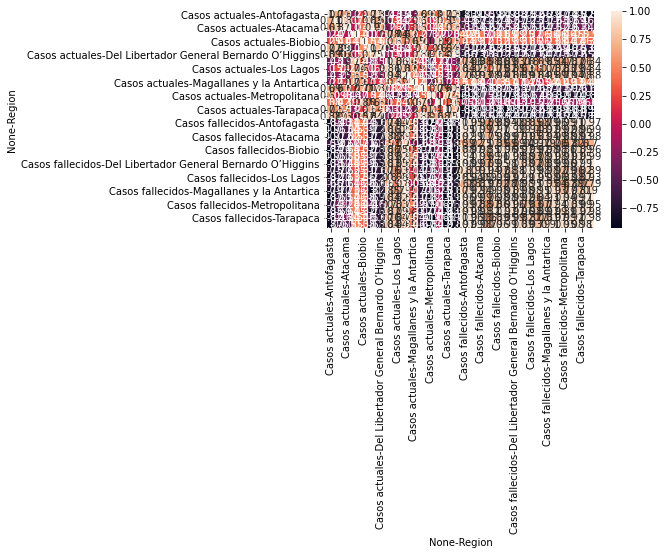

In [62]:
correlations = df_joined.corr()
sns.heatmap(correlations, annot=True)

In [1]:
plt.title("Current  vs Deaths")
plt.xlabel("Deaths")
plt.ylabel("Current")
sns.scatterplot(x=df_joined['Casos fallecidos'][], y=df_joined['Casos actuales'][], data=df_joined)

SyntaxError: invalid syntax (<ipython-input-1-c25f3a7df748>, line 4)

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of deaths'),
 Text(0.5, 1.0, 'Active cases by Chilean region')]

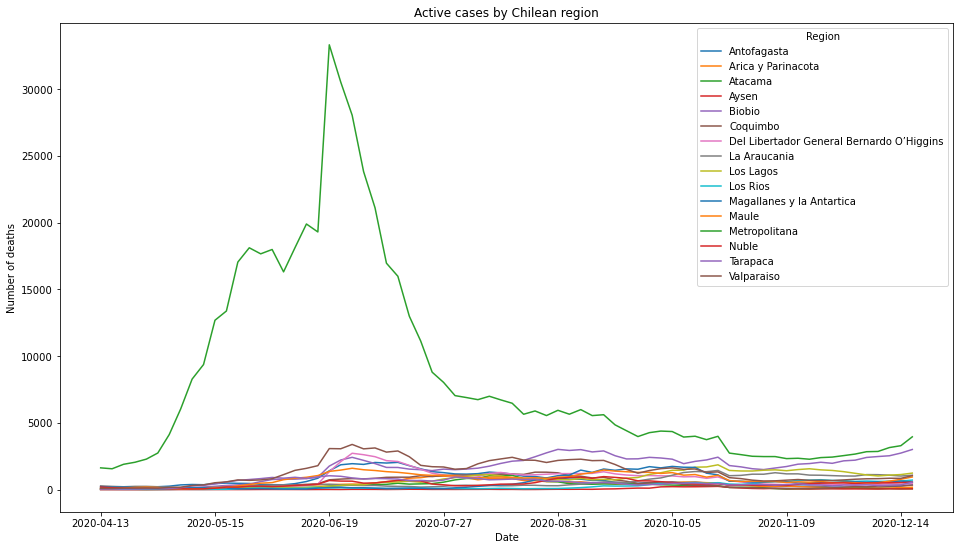

In [12]:
df_region_current['Casos actuales'].plot(figsize=(16, 9)
      ).set(xlabel="Date", 
            ylabel="Number of deaths", 
            title="Active cases by Chilean region")

In [13]:
# DF filtered by total cases by region

df_city_probable["Region"]

0         Antofagasta
1         Antofagasta
2         Antofagasta
3         Antofagasta
4         Antofagasta
             ...     
830785          Ñuble
830786          Ñuble
830787          Ñuble
830788          Ñuble
830789          Ñuble
Name: Region, Length: 830790, dtype: object

In [14]:
# regional daily deaths 

df_region_deaths = df_city_deaths[df_city_deaths["Comuna"]=="Total"]

df_region_deaths = df_region_deaths[["Region", "Poblacion", "Fecha", "Casos fallecidos"]]

df_region_deaths = df_region_deaths.pivot(index='Fecha', columns='Region', values=['Casos fallecidos'])

df_region_deaths.tail()


Casos fallecidos                                                   \
Region          Antofagasta Arica y Parinacota Atacama Aysen Biobio Coquimbo   
Fecha                                                                          
2020-12-04            594.0              217.0   105.0  13.0  658.0    291.0   
2020-12-07            597.0              219.0   105.0  14.0  670.0    292.0   
2020-12-11            599.0              221.0   106.0  14.0  693.0    293.0   
2020-12-14            607.0              222.0   108.0  14.0  721.0    299.0   
2020-12-18            607.0              225.0   109.0  14.0  740.0    306.0   

                                                                             \
Region     Del Libertador General Bernardo O’Higgins La Araucania Los Lagos   
Fecha                                                                         
2020-12-04                                     565.0        237.0     219.0   
2020-12-07                                     571.0        246.0     227.0   
2020-12-11                                     576.0        253.0     229.0   
2020-12-14                                     580.0        257.0     237.0   
2020-12-18                                     583.0        263.0     243.0   

                                                                           \
Region     Los Rios Magallanes y la Antartica  Maule Metropolitana  Nuble   
Fecha                                                                       
2020-12-04     59.0                     213.0  509.0       10789.0  187.0   
2020-12-07     62.0                     218.0  511.0       10838.0  187.0   
2020-12-11     64.0                     223.0  514.0       10896.0  193.0   
2020-12-14     71.0                     229.0  525.0       10950.0  197.0   
2020-12-18     74.0                     230.0  531.0       11000.0  201.0   

                                
Region     Tarapaca Valparaiso  
Fecha                           
2020-12-04    267.0     1254.0  
2020-12-07    269.0     1264.0  
2020-12-11    271.0     1272.0  
2020-12-14    274.0     1286.0  
2020-12-18    279.0     1300.0

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of deaths'),
 Text(0.5, 1.0, 'Deaths by Chilean region')]

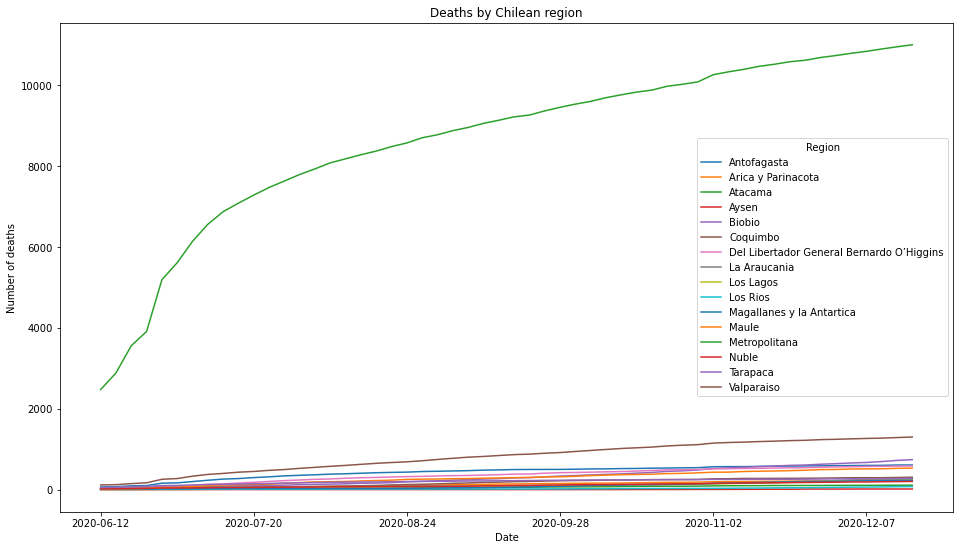

In [15]:
df_region_deaths['Casos fallecidos'].plot(figsize=(16, 9)
      ).set(xlabel="Date", 
            ylabel="Number of deaths", 
            title="Deaths by Chilean region")

In [16]:
pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto11/bulk/producto4.csv")

,Region,Casostotalesacumulados,Casosnuevostotales,Casosnuevosconsintomas,Casosnuevossinsintomas*,Fallecidos,%Total,Fecha,Fallecidostotales,Nuevos Casos,Casos Confirmados,Casosnuevossinsintomas,Tasa*100000,Incrementodiario,Region ID,Poblacion,Tasa
0,Arica y Parinacota,378.0,1.0,1.0,0.0,7,0.86%,2020/05/17,NaN,NaN,NaN,NaN,NaN,NaN,15,252110,NaN
1,Tarapacá,975.0,130.0,108.0,22.0,4,2.23%,2020/05/17,NaN,NaN,NaN,NaN,NaN,NaN,1,382773,NaN
2,Antofagasta,1505.0,76.0,60.0,16.0,13,3.44%,2020/05/17,NaN,NaN,NaN,NaN,NaN,NaN,2,691854,NaN
3,Atacama,149.0,3.0,2.0,1.0,0,0.34%,2020/05/17,NaN,NaN,NaN,NaN,NaN,NaN,3,314709,NaN
4,Coquimbo,194.0,7.0,1.0,6.0,2,0.44%,2020/05/17,NaN,NaN,NaN,NaN,NaN,NaN,4,836096,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,Araucanía,NaN,NaN,NaN,NaN,0,NaN,2020/03/24,NaN,19.0,59.0,NaN,NaN,NaN,9,1014343,5.816573
1548,Los Ríos,NaN,NaN,NaN,NaN,0,NaN,2020/03/24,NaN,2.0,6.0,NaN,NaN,NaN,14,405835,1.478433
1549,Los Lagos,NaN,NaN,NaN,NaN,0,NaN,2020/03/24,NaN,3.0,36.0,NaN,NaN,NaN,10,891440,4.038410
1550,Aysén,NaN,NaN,NaN,NaN,0,NaN,2020/03/24,NaN,0.0,1.0,NaN,NaN,NaN,11,107297,0.931993


### Background 

There is already information available about adapted SEIR models being used for modelling and fit diverse Covid19 data curves [1,2,3,4,5]. However, these agree that is utterly necesary to analyse each country under their own specific parameters, because the different approach taken against the pandemic, i.e. lockdown situations and population response to those measures behaves in a country specific way. For example, data for Chile has being analysed by Guerrero and Manríquez (2020) and Cabrera-Vives *et al* (2020). In both works cases were split into four main groups

- Susceptible (S(t)):  Fraction of each location’s population that is susceptible
- Exposed (E(t)):  Infected but not infectious
- Infectious (I(t)): Number of infectious people
- Recovered (R(t)): Number of recovered individuals as a function of time

Considering the variations of these variables as

\begin{equation} \frac{\partial S}{\partial t} = -\beta SI \end{equation}

\begin{equation}\frac{\partial E}{\partial t} = \beta SI -\sigma E \end{equation}

\begin{equation}\frac{\partial I}{\partial t} = \sigma E - \gamma I \end{equation}

\begin{equation}\frac{\partial R}{\partial t} = \gamma I \end{equation}

where 
             $\beta$ is the contagious rate, 
                     $\sigma^{-1}$ is the incubation period, 
 $\gamma^-1$ contagious period
 


However, Reiner *et al.* (2020) added new variables using COVID-19 hospital data, which allowed to estimate the number of individuals in hospital and in intensive care. Hospitalisation data therefore gets used in two ways: 
1. As a leading predictor of daily deaths 
2. As a statistic used to define the number of hospitalisations that result in deaths.

Also in this work other variables such as mobility, demography, altitude, population density, pollution, smoking, pneumonia seasonality, mask use, testing per capita and quarantine level were considered

\begin{equation} 
\frac{\partial S}{\partial t} = -\beta_{(t)} \frac{S(I_1 + I_2)^\alpha}{N} - \theta^+S
\end{equation}

\begin{equation}
\frac{\partial E}{\partial t} = \beta_{(t)} \frac{S(I_1 + I_2)^\alpha}{N}  -\sigma E + \theta^+ S - \theta^- E
\end{equation}

\begin{equation}
\frac{\partial I_1}{\partial t} = \sigma E - \gamma_1 I_1
\end{equation}

\begin{equation}
\frac{\partial I_2}{\partial t} = \gamma_1 I_1 - \gamma_2 I_2
\end{equation}

\begin{equation}
\frac{\partial R}{\partial t} = \gamma_2 I_2 + \theta^- E
\end{equation}

where 
- $\alpha$ represents a mixing coefficient to account for imperfect mixing within each location, 
- $\sigma$ is the rate at which infected individuals become infectious, 
- $\gamma_1$ is the rate at which infectious people transition out of the pre-symptomatic phase,
- $\gamma_2$ is the rate at which individuals recover. 
- $\theta$ are the corrections  mathematically described using $\theta^+$ and $\theta^-$ for the importation correction and the small location correction

This model does not distinguish between symptomatic and asymptomatic infections but has two infectious compartments ($I_1$ and $I_2$) to allow for interventions that would avoid focus on those who could not be symptomatic. $I_1$ is thus the pre-symptomatic compartment. 

These parameter values are drawn from distributions based on existing literature

$\beta$ regression coefficient constraints

Covariate | Time-varying | Lower Bound | Upper Bound | Covariate Coefficient | Definition
---|---|---|---|---|---
Pneumonia seasonality | Yes | 0.9 | 1.31 | 1.035 (0.90 to 1.31) | Proportion of pneumonia deaths to total deaths by week of the calendar year; by location
Mobility | Yes | 0 | ∞ | 9.45E-3 (95% UI: 7.10E-3 to 1.21E-2) | Composite indicator of multiple mobilitysources, expressed as percent reduction from "norm". Projected based on social distancing mandates
Mask Use | Yes | -0.52 | 0 | -0.502 (-0.520 to -0.380) | Percentage of the population who "always" wear a mask
Testing | Yes | -80 | 0 | -25.9 (-54.6 to -6.37) | Number of tests administered daily divided by population per location 
Air Quality | No | 0 | ∞ | 2.00E-5 (0.0 to 1.38E-4) | Population-weighted annual mean PM2.5 exposure 
Smoking Prevalence | No | 0 | 1 | 1.38E-2 (0.0 to 0.102) | Smoking exposure per capita (time invariant) (Adult age-standardised [15+ years], both sexes) 
LRI Mortality | No | 0 | ∞ | 5.89E-4 (0.0 to 4.65E-3) | age15+ age-standardised LRI mortality rate by location (time invariant, based on 2019 results) 
Altitude | No | 0 | ∞ | 1.38E-3 (0.0 to 8.97E-3) | Proportion population below 100 m altitude
Population Density | No | 0 |∞ | 2.5E-6 (0.0 to 4.6E-6) | Percentage of population living in areas more dense than 1,000 ppl per square km

Using the Runge-Kutta 4 algorithm the ODEs can be run forward to have a complete time-series of infections through the end of the year.



Here we would try to do a region specific analysis that would aggregate and scale up following the principle __city < region < country__ and always considering their population as normalization value, making situations comparable.

### Exploratory Analysis

In [17]:
df = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto25/CasosActualesPorComuna_std.csv")

df.head() #variables are "Region", "Codigo region", ¨"Comuna", "Codigo Comuna", "Poblacion", "Fecha". "Casos actuales"
 
df.tail() #at 31-10-2020 there are 21545 observations

df.shape # df dimmensions (21546, 7)

df.columns 
#Index(['Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Poblacion',
#'Fecha', 'Casos actuales'],
#dtype='object')

#df.describe() ## this is not part of the analysis as it was just to explore the data, an values have no real value


Index(['Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Poblacion',
       'Fecha', 'Casos actuales'],
      dtype='object')

### Data wrangling and cleaning

In [18]:
df.count() 
#All variables seem to have 21546 observations but 'Codigo comuna' and 'Casos actuales'
#which show 19722  and 21226 observetaions respectivly possiblly due to presence of NA values

Region            27216
Codigo region     27216
Comuna            27216
Codigo comuna     24912
Poblacion         26064
Fecha             27216
Casos actuales    26896
dtype: int64

In [19]:
df[df['Codigo comuna'].isna()] 
#Missing values are indicating absence of city_code and are ported as unknown and the region name
#This probably because there are cases with unknown procedence within a specific region
#Also total values are reported as NA
#df contains 1824 observations with NA values

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Casos actuales
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,2020-04-13,NaN
5,Arica y Parinacota,15,Total,NaN,252110.0,2020-04-13,88.0
13,Tarapaca,1,Desconocido Tarapaca,NaN,NaN,2020-04-13,NaN
14,Tarapaca,1,Total,NaN,382773.0,2020-04-13,30.0
24,Antofagasta,2,Desconocido Antofagasta,NaN,NaN,2020-04-13,NaN
...,...,...,...,...,...,...,...
27190,Los Lagos,10,Total,NaN,891440.0,2020-12-18,1233.0
27201,Aysen,11,Desconocido Aysen,NaN,NaN,2020-12-18,5.0
27202,Aysen,11,Total,NaN,107297.0,2020-12-18,56.0
27214,Magallanes y la Antartica,12,Desconocido Magallanes,NaN,NaN,2020-12-18,2.0


In [20]:
df[df['Casos actuales'].isna()] #There are 320 rows with NA values

df_clean = df.fillna(value = {'Casos actuales':0}) 
# in the case of cases, this correspond to days with 0 or not reported No of cases
# Hence, these were replaced by a 0 value


df_clean[df_clean['Casos actuales'].isna()] #No NA found


,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Casos actuales


In [21]:
#Variable names will be changed for good data practices
#old variables ['Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Poblacion','Fecha', 'Casos actuales']
#old variables

df_clean.rename(columns={"Region":"region", 
                   "Codigo region":"region_code",
                   "Comuna":"city",
                   "Codigo comuna":"city_code",
                   "Poblacion":"population",
                   "Fecha":"date",
                   "Casos actuales":"cases"
                  }, inplace = True)
df_clean.head()

,region,region_code,city,city_code,population,date,cases
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-04-13,88.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-04-13,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-04-13,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-04-13,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,2020-04-13,0.0


In [22]:
#Normalise city cases by 1000 inhabitants

df_clean['cases_1000'] = df_clean['cases']/(df_clean['population']/1000)
df_clean

,region,region_code,city,city_code,population,date,cases,cases_1000
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-04-13,88.0,0.355481
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-04-13,0.0,0.000000
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-04-13,0.0,0.000000
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-04-13,0.0,0.000000
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,2020-04-13,0.0,NaN
...,...,...,...,...,...,...,...,...
27211,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,2020-12-18,1.0,1.468429
27212,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,2020-12-18,0.0,0.000000
27213,Magallanes y la Antartica,12,Torres del Paine,12402.0,1021.0,2020-12-18,1.0,0.979432
27214,Magallanes y la Antartica,12,Desconocido Magallanes,NaN,NaN,2020-12-18,2.0,NaN


In [23]:
#drop city and region codes
df_clean = df_clean[['region','city','population','date','cases','cases_1000']]

df_clean


,region,city,population,date,cases,cases_1000
0,Arica y Parinacota,Arica,247552.0,2020-04-13,88.0,0.355481
1,Arica y Parinacota,Camarones,1233.0,2020-04-13,0.0,0.000000
2,Arica y Parinacota,General Lagos,810.0,2020-04-13,0.0,0.000000
3,Arica y Parinacota,Putre,2515.0,2020-04-13,0.0,0.000000
4,Arica y Parinacota,Desconocido Arica y Parinacota,NaN,2020-04-13,0.0,NaN
...,...,...,...,...,...,...
27211,Magallanes y la Antartica,San Gregorio,681.0,2020-12-18,1.0,1.468429
27212,Magallanes y la Antartica,Timaukel,282.0,2020-12-18,0.0,0.000000
27213,Magallanes y la Antartica,Torres del Paine,1021.0,2020-12-18,1.0,0.979432
27214,Magallanes y la Antartica,Desconocido Magallanes,NaN,2020-12-18,2.0,NaN


### Data analysis

Text(0, 0.5, 'Region')

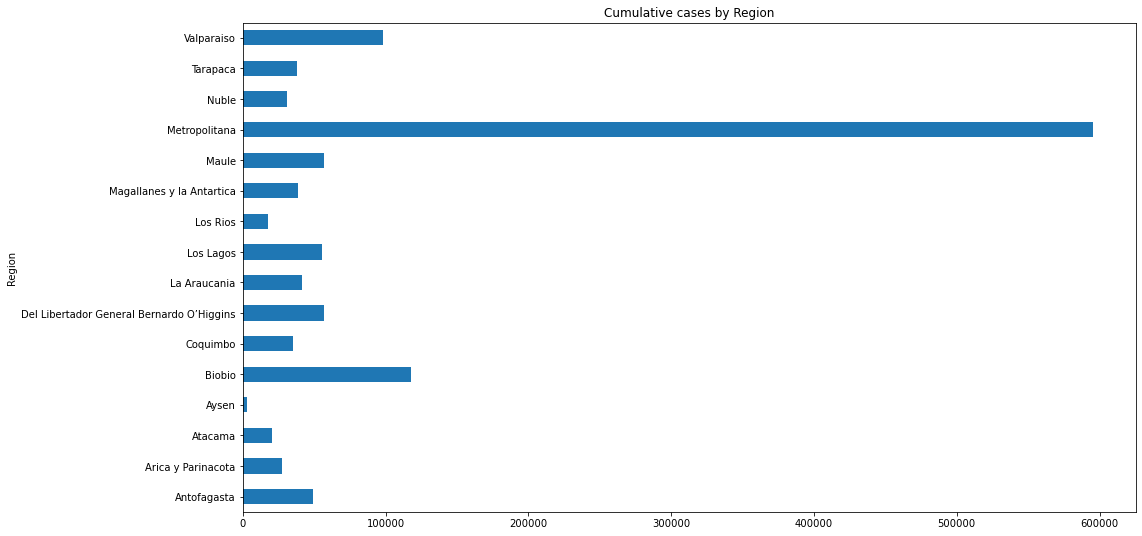

In [24]:
# Data will be subsetted in Regional data and city. 
# For the regional data the total population value would be used to normalise the cumulative city cases
# For the the different cities, data would be used as it is due to the Unknown city population parameter

df_cumulative = df_clean[df_clean['city'] == 'Total'].groupby('region')['cases'].sum()

df_cumulative.plot.barh(x='region', y='cases', figsize=(16, 9))
plt.title("Cumulative cases by Region")
plt.xlabel("")
plt.ylabel("Region")

Text(0, 0.5, 'Region')

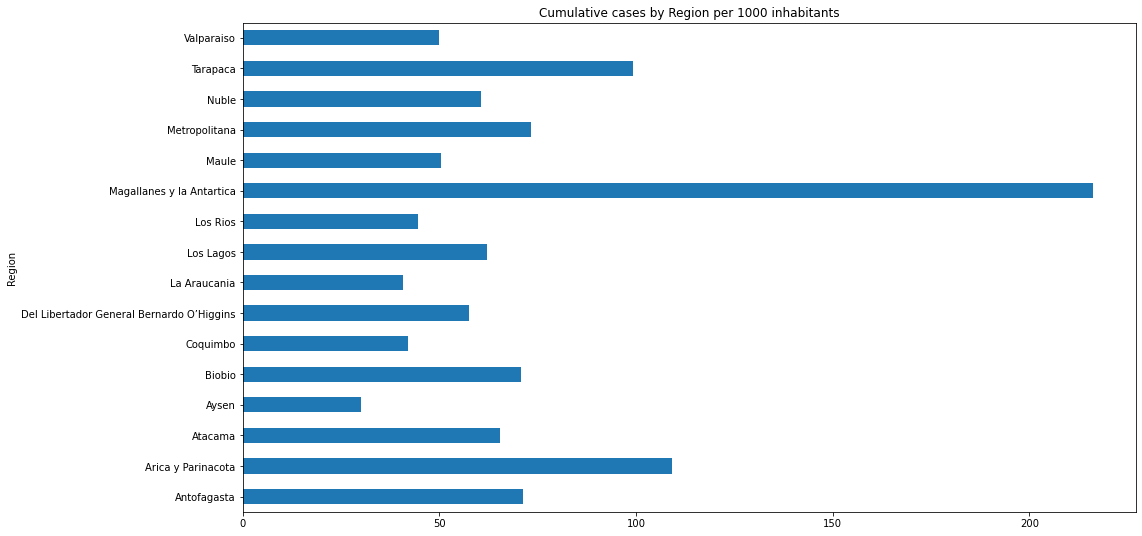

In [25]:
df_cumulative_1000 = df_clean[df_clean['city'] == 'Total'].groupby('region')['cases_1000'].sum()
df_cumulative_1000.plot.barh(x='region', y='cases_1000', figsize=(16, 9))
plt.title("Cumulative cases by Region per 1000 inhabitants")
plt.xlabel("")
plt.ylabel("Region")

#### Daily cases can be analysed by filtering by an specific date

In [26]:
#For instance filtering by the last date 2020-10-26

df_trial = df_clean[df_clean['date'] == '2020-10-26']

In [27]:
#Summarising data by region

#df_region = df_trial.groupby('region')['cases'].sum()
df_region = df_trial[df_trial['city'] == 'Total']
df_region

,region,city,population,date,cases,cases_1000
21173,Arica y Parinacota,Total,252110.0,2020-10-26,319.0,1.265321
21182,Tarapaca,Total,382773.0,2020-10-26,356.0,0.930055
21193,Antofagasta,Total,691854.0,2020-10-26,317.0,0.458189
21204,Atacama,Total,314709.0,2020-10-26,169.0,0.537004
21221,Coquimbo,Total,836096.0,2020-10-26,150.0,0.179405
21261,Valparaiso,Total,1960170.0,2020-10-26,821.0,0.418841
21315,Metropolitana,Total,8125072.0,2020-10-26,2617.0,0.322089
21350,Del Libertador General Bernardo O’Higgins,Total,991063.0,2020-10-26,576.0,0.581194
21382,Maule,Total,1131939.0,2020-10-26,604.0,0.533598
21405,Nuble,Total,511551.0,2020-10-26,349.0,0.682239


Text(0, 0.5, 'Region')

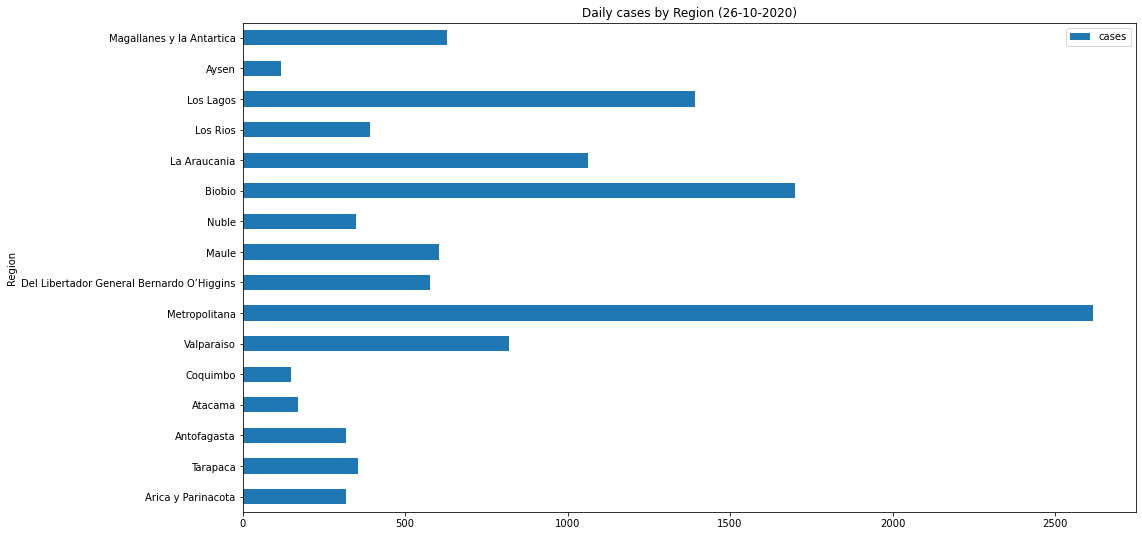

In [28]:
df_region.plot.barh(x='region', y='cases', figsize=(16, 9))
plt.title("Daily cases by Region (26-10-2020)")
plt.xlabel("")
plt.ylabel("Region")

Text(0, 0.5, 'Region')

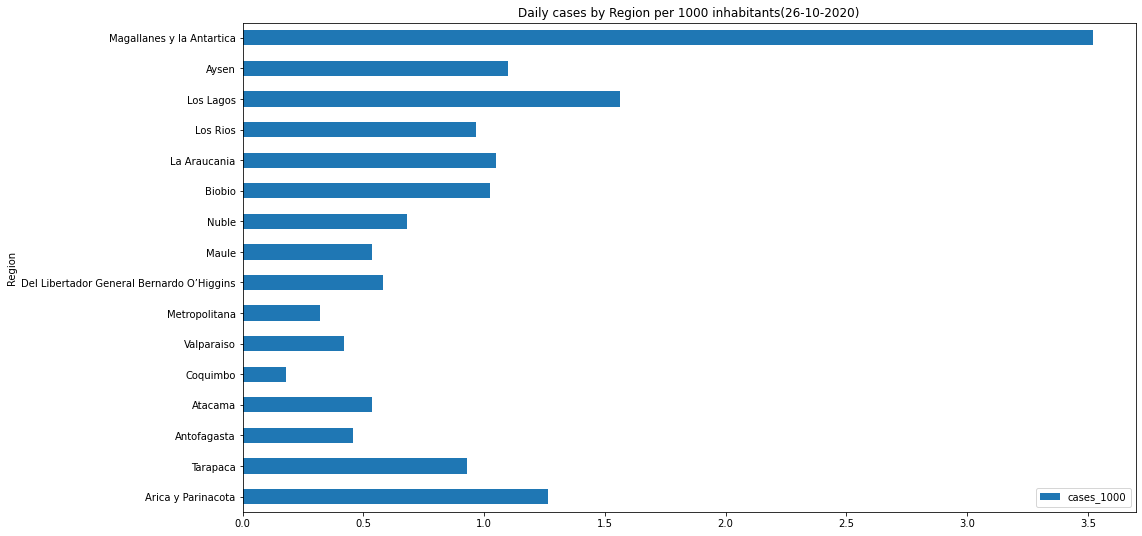

In [29]:
df_region.plot.barh(x='region', y='cases_1000', figsize=(16, 9))
plt.title("Daily cases by Region per 1000 inhabitants(26-10-2020)")
plt.xlabel("")
plt.ylabel("Region")

Data can be expanded and analysed for each city within a region

Text(0, 0.5, 'City')

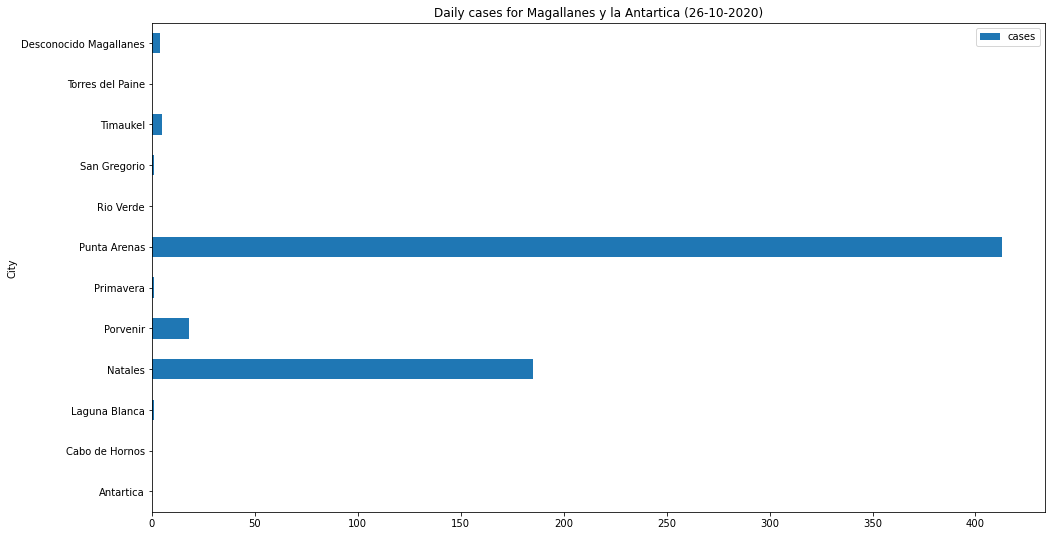

In [30]:
#i.e. Megallanes

df_city = df_trial[(df_trial['region'] == 'Magallanes y la Antartica') & (df_trial['city'] != 'Total')]

df_city.plot.barh(x='city', y='cases', figsize=(16, 9))
plt.title("Daily cases for Magallanes y la Antartica (26-10-2020)")
plt.xlabel("")
plt.ylabel("region")

#### Time series can be analysed using either region or city data

The resulting dataframe is pivoted so we get one row per __date__, columns by __region__ and the number of new cases per 1000 inhabitants for that date and region in the cells. Again, show the first 10 rows from our new dataframe ts_region to check the result of our pivot.

In [31]:
#by region

ts_region = df_clean[df_clean['city'] == 'Total']

ts_region = ts_region[[
    'region','date','cases', 'cases_1000'
]].pivot(index='date', columns='region', values=['cases', 'cases_1000'])

ts_region.head()

cases                                                   \
region     Antofagasta Arica y Parinacota Atacama Aysen Biobio Coquimbo   
date                                                                      
2020-04-13        79.0               88.0     9.0   2.0  230.0     19.0   
2020-04-15        89.0               81.0     9.0   0.0  176.0     19.0   
2020-04-17       104.0               74.0     9.0   0.0  147.0     14.0   
2020-04-20       131.0               66.0     7.0   0.0  132.0     14.0   
2020-04-24       180.0               79.0     7.0   0.0  152.0      9.0   

                                                                             \
region     Del Libertador General Bernardo O’Higgins La Araucania Los Lagos   
date                                                                          
2020-04-13                                       9.0        277.0     131.0   
2020-04-15                                       9.0        238.0      93.0   
2020-04-17                                       9.0        210.0      80.0   
2020-04-20                                       9.0        239.0      66.0   
2020-04-24                                      29.0        240.0      51.0   

                     ...                                cases_1000  \
region     Los Rios  ... Del Libertador General Bernardo O’Higgins   
date                 ...                                             
2020-04-13     50.0  ...                                  0.009081   
2020-04-15     37.0  ...                                  0.009081   
2020-04-17     32.0  ...                                  0.009081   
2020-04-20     25.0  ...                                  0.009081   
2020-04-24     18.0  ...                                  0.029262   

                                                                       \
region     La Araucania Los Lagos  Los Rios Magallanes y la Antartica   
date                                                                    
2020-04-13     0.273083  0.146953  0.123203                  1.205414   
2020-04-15     0.234635  0.104326  0.091170                  1.037216   
2020-04-17     0.207031  0.089742  0.078850                  1.026003   
2020-04-20     0.235620  0.074038  0.061601                  1.059643   
2020-04-24     0.236606  0.057211  0.044353                  0.840986   

                                                                   
region         Maule Metropolitana     Nuble  Tarapaca Valparaiso  
date                                                               
2020-04-13  0.043289      0.200121  0.371419  0.078375   0.044894  
2020-04-15  0.042405      0.191629  0.273678  0.091438   0.042343  
2020-04-17  0.103362      0.232859  0.216987  0.099276   0.052036  
2020-04-20  0.147534      0.251690  0.160297  0.109726   0.055097  
2020-04-24  0.165203      0.280613  0.152477  0.159363   0.056628  

[5 rows x 32 columns]

We can describe the columns to get an idea of what's there.

In [32]:
ts_region.describe().transpose()

count         mean  \
           region                                                          
cases      Antofagasta                                 72.0   684.819444   
           Arica y Parinacota                          72.0   382.236111   
           Atacama                                     72.0   286.055556   
           Aysen                                       72.0    44.708333   
           Biobio                                      72.0  1636.625000   
           Coquimbo                                    72.0   486.555556   
           Del Libertador General Bernardo O’Higgins   72.0   792.166667   
           La Araucania                                72.0   573.597222   
           Los Lagos                                   72.0   768.791667   
           Los Rios                                    72.0   250.680556   
           Magallanes y la Antartica                   72.0   535.444444   
           Maule                                       72.0   792.583333   
           Metropolitana                               72.0  8269.222222   
           Nuble                                       72.0   431.250000   
           Tarapaca                                    72.0   527.083333   
           Valparaiso                                  72.0  1360.347222   
cases_1000 Antofagasta                                 72.0     0.989832   
           Arica y Parinacota                          72.0     1.516148   
           Atacama                                     72.0     0.908953   
           Aysen                                       72.0     0.416678   
           Biobio                                      72.0     0.983728   
           Coquimbo                                    72.0     0.581937   
           Del Libertador General Bernardo O’Higgins   72.0     0.799310   
           La Araucania                                72.0     0.565486   
           Los Lagos                                   72.0     0.862415   
           Los Rios                                    72.0     0.617691   
           Magallanes y la Antartica                   72.0     3.002010   
           Maule                                       72.0     0.700200   
           Metropolitana                               72.0     1.017741   
           Nuble                                       72.0     0.843024   
           Tarapaca                                    72.0     1.377013   
           Valparaiso                                  72.0     0.693995   

                                                              std  \
           region                                                   
cases      Antofagasta                                 549.499601   
           Arica y Parinacota                          271.141068   
           Atacama                                     275.328070   
           Aysen                                        61.786191   
           Biobio                                      894.966243   
           Coquimbo                                    424.569903   
           Del Libertador General Bernardo O’Higgins   660.344639   
           La Araucania                                404.383226   
           Los Lagos                                   533.941916   
           Los Rios                                    241.656830   
           Magallanes y la Antartica                   523.480683   
           Maule                                       433.441412   
           Metropolitana                              7438.296742   
           Nuble                                       232.711134   
           Tarapaca                                    266.168471   
           Valparaiso                                  877.999778   
cases_1000 Antofagasta                                   0.794242   
           Arica y Parinacota                            1.075487   
           Atacama                                       0.874866   
           Aysen    

Get to know your data by visualization, in this case the number of new cases per day for my home region Aysen.

<AxesSubplot:xlabel='date'>

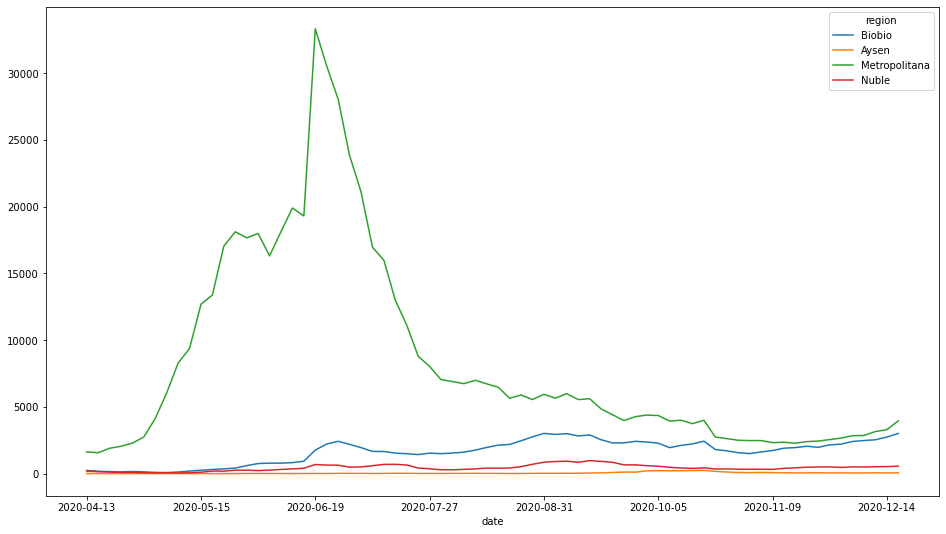

In [33]:
ts_region['cases'][['Biobio', 'Aysen', 'Metropolitana', 'Nuble']].plot(figsize=(16, 9))

As observed in the previous plot, data cannot be easily compared between different regions. Therefore, If you want to compare the number of cases you must normalise by the number of inhabitants on each region

<AxesSubplot:xlabel='date'>

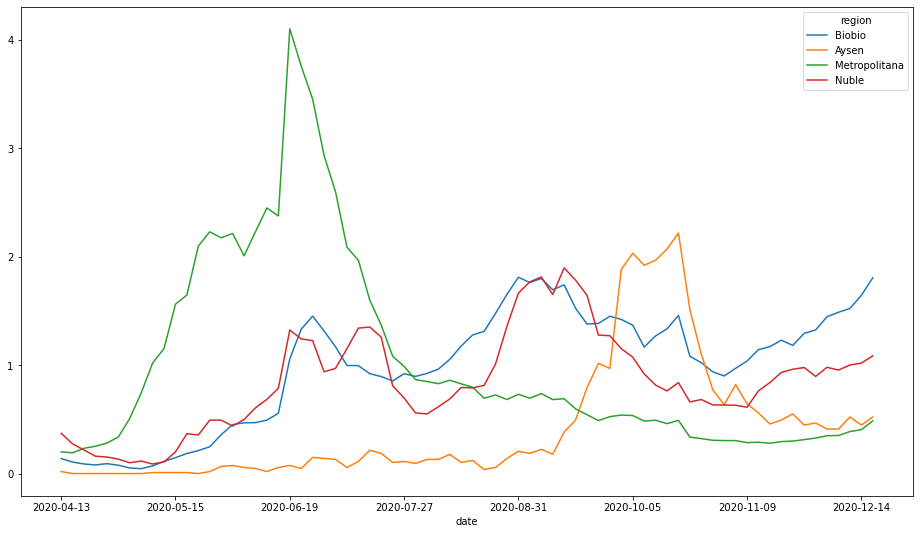

In [34]:
ts_region['cases_1000'][['Biobio', 'Aysen', 'Metropolitana', 'Nuble']].plot(figsize=(16, 9))

To see the growth in number of cases, we use a cumulative sum with cumsum, in this case we show Aysen, Antofagasta, Valparaiso and Bio Bio.


<AxesSubplot:xlabel='date'>

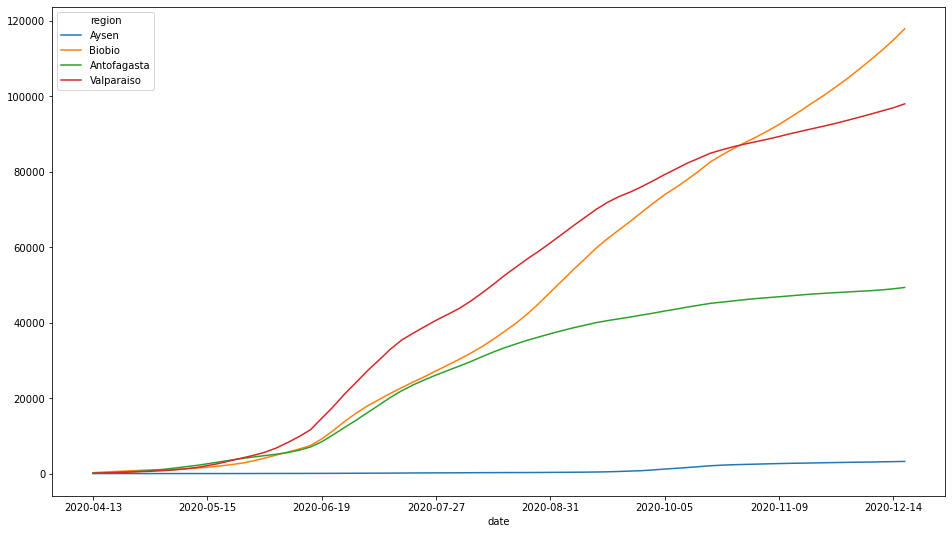

In [35]:
ts_region['cases'][['Aysen', 'Biobio', 'Antofagasta', 'Valparaiso']].cumsum().plot(figsize=(16, 9))

From the previous analysis you can observe that it is always better to analyse each case normalised by the number of inhabitants making comparison among different regions possible. To prove this we plot the Metropolitan region (Santiago) which has the highest country population and also the highest number of cases with all other regions
 

<AxesSubplot:xlabel='date'>

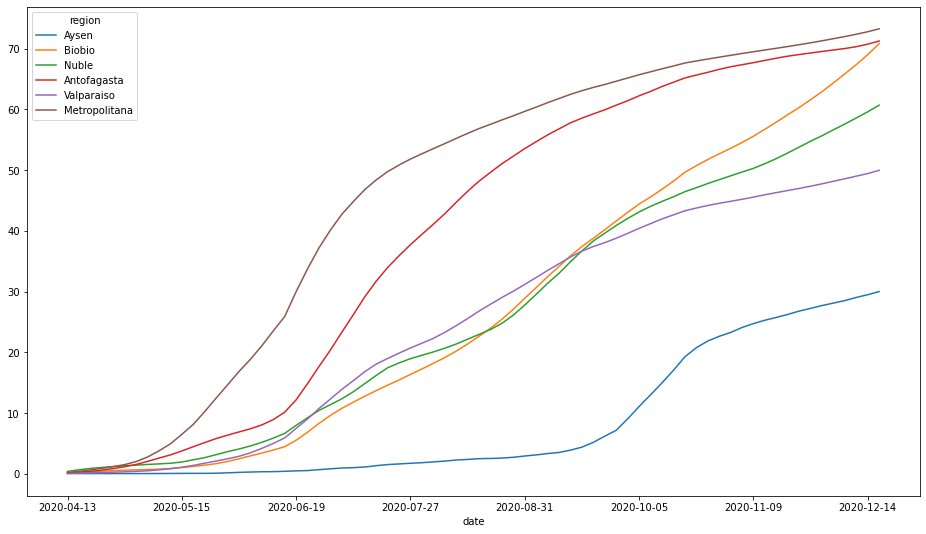

In [36]:
ts_region['cases_1000'][['Aysen', 'Biobio', 'Nuble', 'Antofagasta', 'Valparaiso', 'Metropolitana']].cumsum().plot(figsize=(16, 9))

What about infection rate? The example below gives the average number of cases for last week divided by the infectious cases a week before, a proxy for the infamous __R measure__ [7]. Again we use rolling window for smoothing and add a couple of example options for plot.

<AxesSubplot:xlabel='date'>

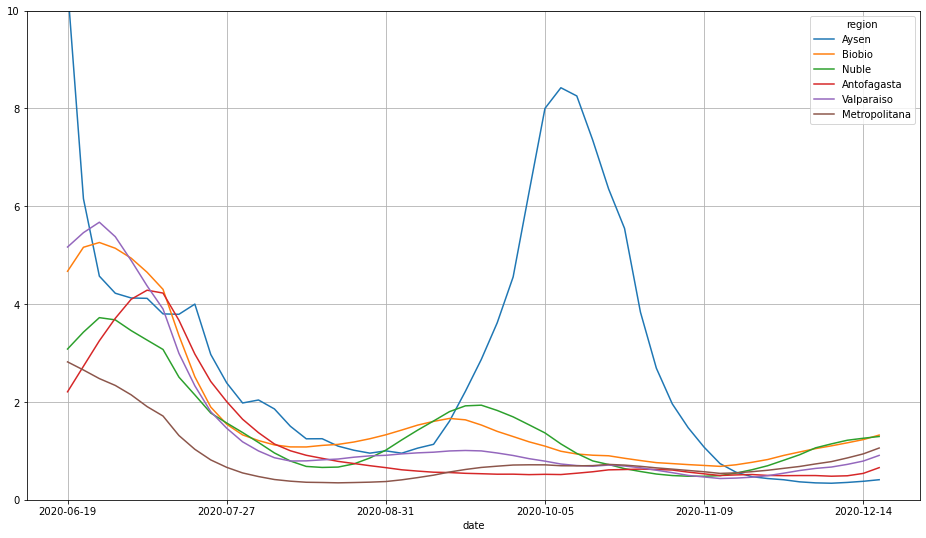

In [37]:
regions = ['Aysen', 'Biobio','Nuble', 'Antofagasta', 'Valparaiso', 'Metropolitana']

(ts_region.rolling(7).mean() / ts_region.shift(7).rolling(14).mean(
    ))['cases'][regions].loc['2020-04-13':].plot(
    figsize=(16, 9), grid=True, ylim=(0, 10))

Based on a recent paper by Daddi and Giavalisco (2020), the double log of the cumulative cases divided by the daily increase should approach linearity. Ignoring the noise of spurious cases in the beginning, at least some parts of the outbreak looks promising.


<ipython-input-38-082b6511354f>:1: RuntimeWarning: divide by zero encountered in log
  np.log(np.log(ts_region.cumsum() / ts_region))['cases'][regions].loc['2020-04-13':].rolling(7).mean().plot(


<AxesSubplot:xlabel='date'>

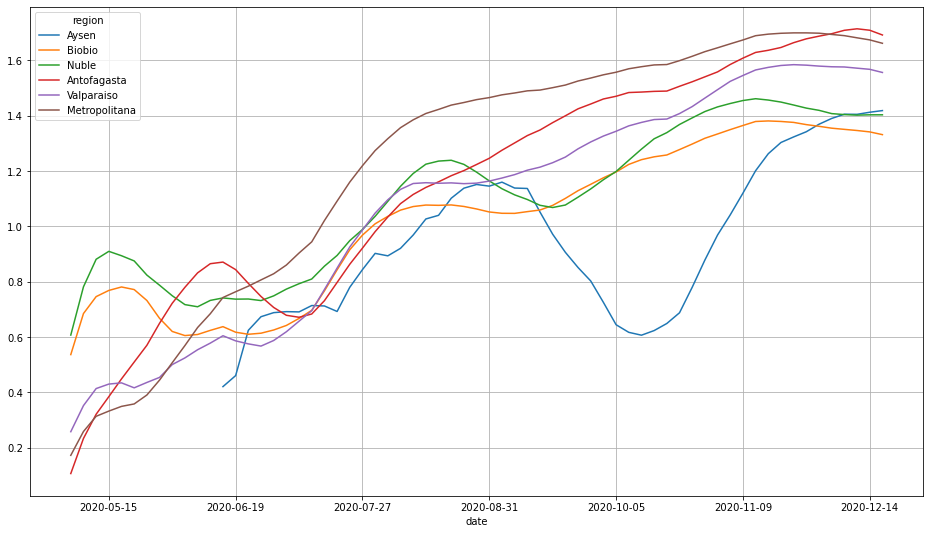

In [38]:
np.log(np.log(ts_region.cumsum() / ts_region))['cases'][regions].loc['2020-04-13':].rolling(7).mean().plot(
    figsize=(16, 9), grid=True)

Because of the large difference in numbers, it may help to use a logarithmic scale. We can change the data passed to the plot using the `log10` function from NumPy. This will generate some warnings because `cases` can be zero.

<AxesSubplot:xlabel='date'>

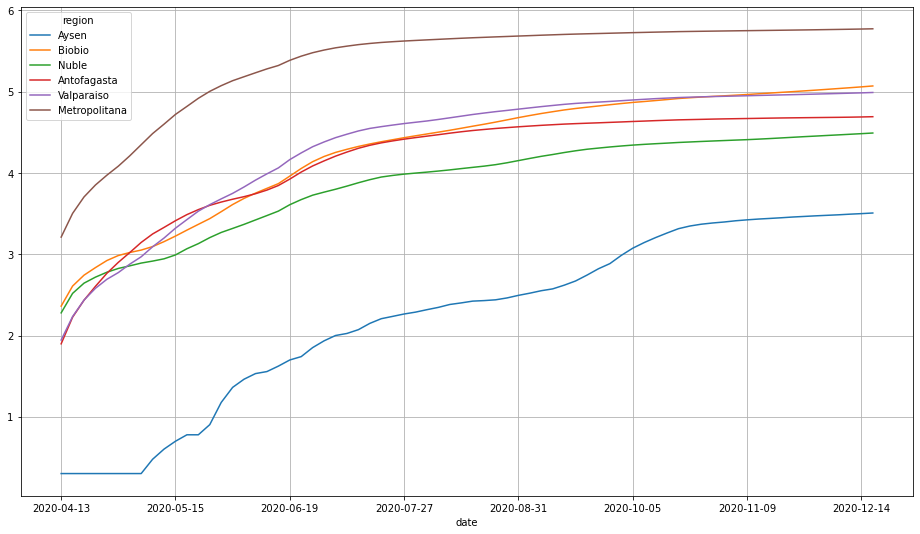

In [39]:
np.log10(ts_region['cases'][regions].cumsum()).plot(figsize=(16, 9), grid=True)

Now let's have a look at the curve which we are supposed to flatten, to prevent overload on our healthcare system. It shows the number of active cases (the infected category in the SIR model). We assume that an infection lasts 14 days on average (which is under discussion, currently the last 14 days is used by EU CDC but other studies suggest 18 days), so we only look at new cases from the last 14 days. By leaving out older infections (the removed category in SIR) this shows us the current number of active infections.

<AxesSubplot:xlabel='date'>

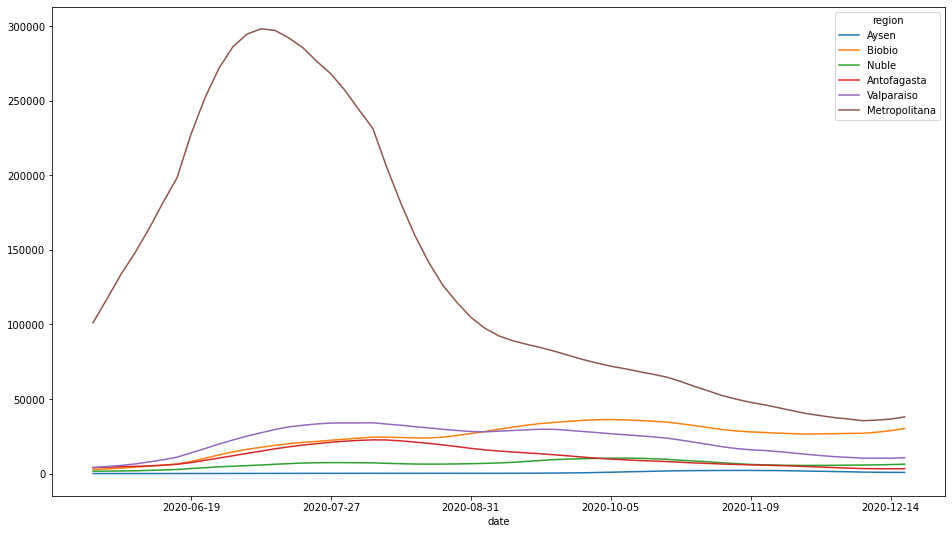

In [40]:
ts_region['cases'][regions].rolling(14).sum().plot(figsize=(16, 9))

Assuming that we see about 8% of currently infected in Intensive Care, we can monitor the necessary capacity with the following graph.

<AxesSubplot:xlabel='date'>

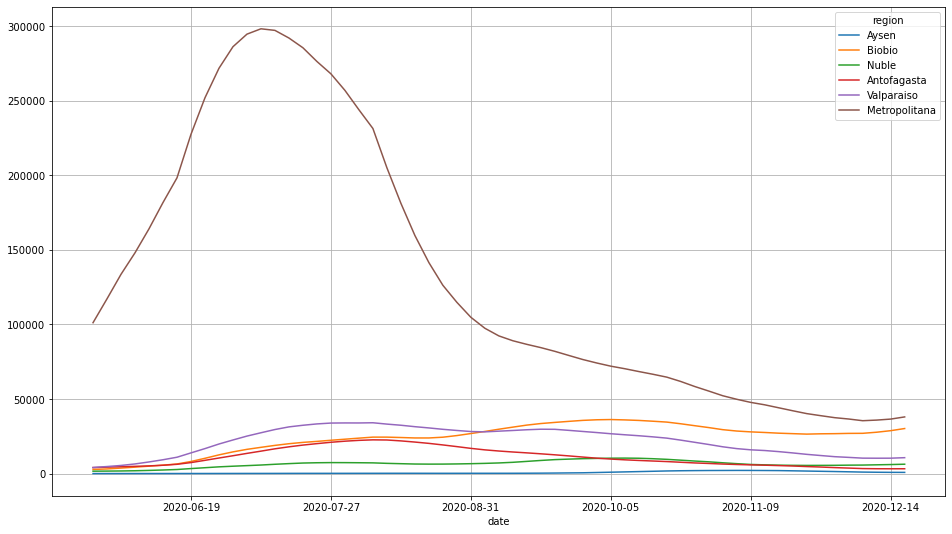

In [41]:
(ts_region['cases'][regions].rolling(14).sum().loc['2020-04-13':] * 1).plot(figsize=(16, 9), grid=True)

Or what about the number of deaths in the week before as part of the number of active cases in the week before that? In other words, an estimate of the death rate for known cases, heavily depending on the testing and recording policies so in no way comparable across countries or even within a country over time.

<AxesSubplot:xlabel='date'>

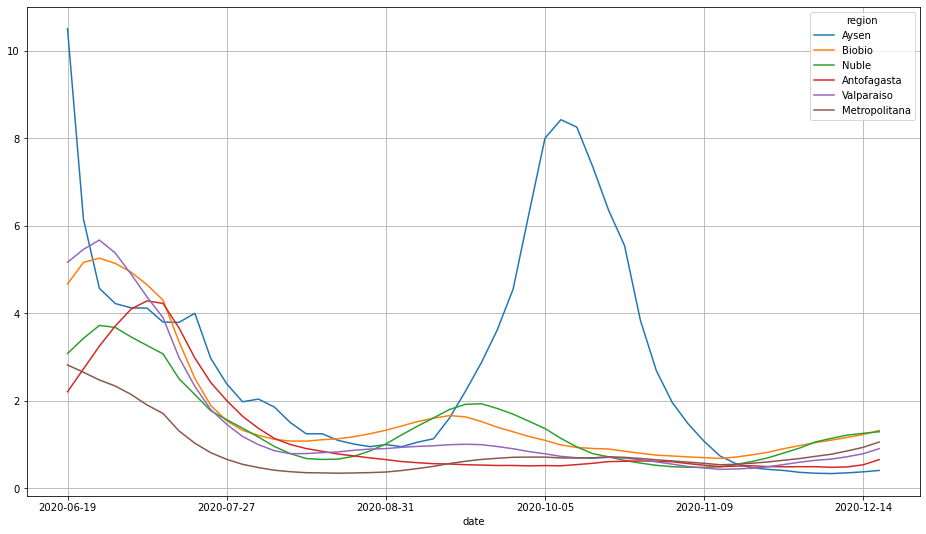

In [42]:
(ts_region.rolling(7).mean()['cases'] / ts_region.shift(7).rolling(14).mean(
    )['cases'])[regions].loc['2020-04-13':].plot(
    figsize=(16, 9), grid=True)

In [43]:
!pip install pandas-profiling

To have a more detailed interactive overview of our dataframe, pandas profiling could be very useful. (not much new information obtained)

In [44]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

### Machine learning method to apply and justification

As we are working with an irregular time series, a forecasting using either Arima or Recurrent Neural Networks is needed





In [45]:
def get_train_test(signal, train_ptg=0.5):
    assert train_ptg >= 0 and train_ptg <= 1, 'train ptg. should be defined in between 0 and 1'
    n_steps = signal.shape[0]
    train_steps = int(n_steps*train_ptg)
    x_train = signal[:train_steps]
    x_test = signal[train_steps:]
    return x_train, x_test

In [46]:
### Training Models

from statsmodels.tsa.arima_model import ARIMA
#we search the best conf. for ARIMA model
import multiprocessing
from joblib import Parallel, delayed
num_cpu = multiprocessing.cpu_count()
print('{} cores available'.format(num_cpu))
#estimate the number of lags in the AR model 
from statsmodels.graphics.tsaplots import plot_pacf

8 cores available


In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def ARIMA_step(data, conf):
    try:
        model = ARIMA(data[:, 1], order=conf)
        model = model.fit(method='css')
        return model
    except Exception as e:
        print(e)
        return None
def compute_hypersearch(dataset, fn_step, pdq, scaler_class=MinMaxScaler):
    best_models = dict()

    for key, value in dataset.items():
        # Train and test split
        x_train, x_test = get_train_test(value, train_ptg=0.9)    

        # Standardize signal
        scaler = scaler_class()
        scaler = scaler.fit(x_train)
        x_train = scaler.transform(x_train)
        
        x_test  = scaler.transform(x_test)
        
        try:
            # Prepare distribution
            p = Parallel(n_jobs=num_cpu)
            response = p(delayed(fn_step)(x_train, conf) for conf in pdq)

            aic_list = [(m.aic, m) for m in response if m is not None]
            aic_list = sorted(aic_list, key=lambda tup: tup[0])
            best_arima = aic_list[0][-1]

            # ARIMA
            x_pred = best_arima.forecast(steps=len(x_test))


            best_models[key] = {'model': best_arima,
                                'forecasting': x_pred,
                                'x_test': x_test,
                                'x_train': x_train}
        except Exception as e:
            print(e)
            pass
    return best_models

def plot_results(dataset, results):
    fig, axes = plt.subplots(1, len(dataset.keys()), figsize=(15,5), sharex=True)
    for i, signal_name in enumerate(dataset.keys()):
        model = results[signal_name]['model']
        x_test = results[signal_name]['x_test']
        
        x_train = results[signal_name]['x_train']

        x_pred = results[signal_name]['forecasting'][0]
        x_time = x_test[:, 0]

        axes[i].plot(x_time, x_pred, marker='.', label='Predicted')
        axes[i].plot(x_time, x_test[:, 1], marker='.', label='Original')

        axes[i].set_title('{}'.format(signal_name))

    axes[0].legend(bbox_to_anchor=(2.6, 1.2), ncol=2)
    plt.show()
    
    import itertools
p = range(0, 3)
d = range(0, 3)
q = range(0, 3)
pdq = list(itertools.product(p,d,q))

ARIMA_results = compute_hypersearch(df, ARIMA_step, pdq)

NameError: name 'itertools' is not defined

In [ ]:
plot_results(ts_region, ARIMA_results)

In [ ]:
regions = ['Aysen', 'Biobio', 'Nuble', 'Antofagasta', 'Valparaiso', 'Metropolitana']

ts_region['cases_1000'][regions].cumsum().plot(figsize=(16, 9)).set(
    xlabel="Date", 
    ylabel="Cumulative number of cases per 1000 inhabitants", 
    title="Cumulative number of cases per 1000 inhabitants (by Region)")

### Recurrent Neural Network



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Defining our model

In [ ]:
def create_model():
    inputs = keras.Input(shape=(None, 2), batch_size=1)
    x = layers.LSTM(16, return_sequences=True, name='LSTM')(inputs)
    x = layers.LayerNormalization(name='LayerNorm_0')(x)
    outputs = layers.Dense(1, name='Regressor')(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name="RNN")
    return model

In [ ]:
model = create_model()

In [ ]:
keras.utils.plot_model(model, "arch.png", show_shapes=True)

### Loading Data

In [ ]:
interpolate=True

In [ ]:
best_models = dict()

for key, value in dataset.items():
    print(key)
    # Standardize signal
    scaler = StandardScaler()
    scaler = scaler.fit(value)
    value = scaler.transform(value)    
    
    # Train and test split
    train, x_rest = get_train_test(value, train_ptg=0.8)  
    val, test = get_train_test(x_rest, train_ptg=0.5)
    
    if interpolate:
        train, train_true = interpolate_signal(train, kind='cubic')
        val, val_true = interpolate_signal(val, kind='cubic')
        test, test_true = interpolate_signal(test, kind='cubic')

    # Inputs and outputs 
    x_train, y_train = train[None, :-1, :2], train[None, 1:, :2]
    x_val, y_val = val[None, :-1, :2], val[None, 1:, :2]
    x_test, y_test = test[None, :-1, :2], test[None, 1:, :2]
    
    # Model
    model = create_model()
    
    # Setting Losses and Optimizer
    model.compile(loss=keras.losses.MeanSquaredError(),
                  optimizer=keras.optimizers.Adam(),
                  metrics=["mse"])

    # Setting callbacks
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                          verbose=0,
                                          restore_best_weights=True)

    # Train    
    history = model.fit(x_train, 
                        y_train, 
                        batch_size=1, 
                        epochs=1000, 
                        verbose=0, 
                        callbacks=[es],
                        validation_data=(x_val, y_val))

    
    y_pred = model.predict(x_test)
    
    best_models[key] = {'model': model,
                        'history': history.history,
                        'forecasting': y_pred,
                        'x_test': x_test_true if interpolate else x_test,
                        'x_train': x_train,
                        'y_test': y_test}

In [ ]:
results = best_models
fig, axes = plt.subplots(1, len(dataset.keys()), figsize=(15,5), sharex=True)
for i, signal_name in enumerate(dataset.keys()):
    model = results[signal_name]['model']
    x_test = results[signal_name]['x_test']
    y_test = results[signal_name]['y_test']

    x_train = results[signal_name]['x_train']

    x_pred = results[signal_name]['forecasting'][0]
    x_time = y_test[0, :, 0]

    axes[i].plot(x_time, x_pred[:, 0], marker='.', label='Predicted')
    axes[i].plot(x_time, y_test[0, :, 1], marker='.', label='Original')

    axes[i].set_title('{}'.format(signal_name))

axes[0].legend(bbox_to_anchor=(2.6, 1.2), ncol=2)
plt.show()

### Learning outcomes (metrics, analysis)

NOTE: I could not make it work, but I'll keep trying


### Preliminary conclusions

The Covid19 data behaves in an irregular way and needs to be analysed using multiple variables as explained by Reiner *et al.* (2020).

However, we can do simpler analyses and projections using moving averages and rolling windows, this are not accurate or close to reality

#### References

1. Reiner, R. C., Barber, R. M., Collins, J. K., Zheng, P., Adolph, C., Albright, J., Antony, C. M., Aravkin, A. Y., Bachmeier, S. D., Bang-Jensen, B., Bannick, M. S., Bloom, S., Carter, A., Castro, E., Causey, K., Chakrabarti, S., Charlson, F. J., Cogen, R. M., Combs, E., … Murray, C. J. L. (2020). Modeling COVID-19 scenarios for the United States. Nature Medicine, 1–12. https://doi.org/10.1038/s41591-020-1132-9

2. Friedman, J., Liu, P., Gakidou, E., Model, C., & Team, C. (2020). Predictive performance of international COVID-19 mortality forecasting models. MedRxiv, 2020.07.13.20151233. https://doi.org/10.1101/2020.07.13.20151233

3. Guo, L., Zhao, Y., & Chen, Y. (2020). Management strategies and prediction of COVID-19 by a fractional order generalized SEIR model. https://doi.org/10.1101/2020.06.18.20134916

4. Newcomb, K., Smith, M. E., Donohue, R. E., Wyngaard, S., Reinking, C., Sweet, C. R., Levine, M. J., Unnasch, T. R., & Michael, E. (2020). Iterative near-term forecasting of the transmission and management of SARS-CoV-2/COVID-19 using social interventions at the county-level in the United States. https://doi.org/10.21203/rs.3.rs-96665/v1

5. Guerrero-Nancuante, C., & Manríquez P, R. (2020). An epidemiological forecast of COVID-19 in Chile based on the generalized SEIR model and the concept of recovered. Medwave, 20(04), e7898–e7898. https://doi.org/10.5867/medwave.2020.04.7898

6. Daddi, E., & Giavalisco, M. (2020). Early forecasts of the evolution of the COVID-19 outbreaks and quantitative assessment of the effectiveness of countering measures. MedRxiv, 2020.04.16.20067553. https://doi.org/10.1101/2020.04.16.20067553 

7. Adam, D. (2020). A guide to R - the pandemic’s misunderstood metric. In Nature (Vol. 583, Issue 7816, pp. 346–348). NLM (Medline). https://doi.org/10.1038/d41586-020-02009-w 

8. Cabrera-Vives, G., Donoso-Oliva, C., Martınez, M., Molina, R., & Sanchez, A. (2020). Informe Proyecciones COVID-19 UdeC. Available online at https://github.com/guille-c/COVID-19/blob/master/Informes/COVID_19_UdeC_27_04_2020_v1.0.pdf


